In [8]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

In [9]:
# set the address of the file on your disk
# this table has factors (output from the factor analysis code)
pathname = (r"C:\MyFiles\Dropbox\Teaching\Advanced_GIS_for_Environmental_Planning\Data\NYC\CensusTracts\Census_Tracts_with_Data_two_factor_brooklyn3.csv")

In [10]:
df = pd.read_csv(pathname)
df.sample(2)

,Unnamed: 0,factor_1,factor_2,factor 3,factor 4,GISJOIN,cluster
158,158,-1.167720,0.455779,-0.179084,0.507320,G3600470036200,1
11,11,-0.803761,-0.809949,-1.678507,0.475589,G3600470033000,0


In [11]:
# lets' get the factors
X=df[['factor_1','factor_2','factor 3','factor 4']]

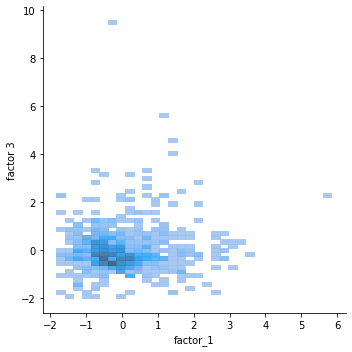

In [12]:
# some scatter plots
sns.displot(data=df,x ='factor_1',y ='factor 3',alpha=0.9)

In [14]:
# creating the cluster object
k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans(n_clusters=3)

In [15]:
# getting the cluster lables and put them in one column
df['cluster'] = k_means.labels_

In [16]:
len(k_means.labels_)

753

In [17]:
df

,Unnamed: 0,factor_1,factor_2,factor 3,factor 4,GISJOIN,cluster
0,0,0.162198,0.116014,-0.407331,1.955926,G3600470031500,1
1,1,-0.362297,0.484156,0.159912,0.862661,G3600470031701,0
2,2,0.184963,-0.111738,0.414752,0.395044,G3600470031702,1
3,3,-0.247721,-0.014986,-0.457322,0.016021,G3600470031900,0
4,4,-0.493576,-0.388551,0.217928,0.688370,G3600470032100,1
...,...,...,...,...,...,...,...
748,748,0.426638,-0.999399,-0.585179,-0.353834,G3600470074000,1
749,749,1.137883,-0.586831,-0.885342,-0.771919,G3600470074200,1
750,750,1.912384,0.381462,-0.988610,-0.853600,G3600470074400,0
751,751,-0.618112,2.918695,-0.751232,-1.043629,G3600810091800,0


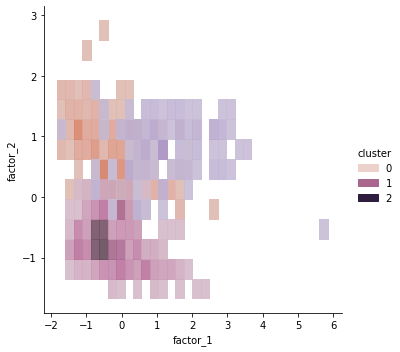

In [18]:
# plotting the factors with clusters
sns.displot(data=df,x ='factor_1',y ='factor_2',hue='cluster',alpha=0.9)

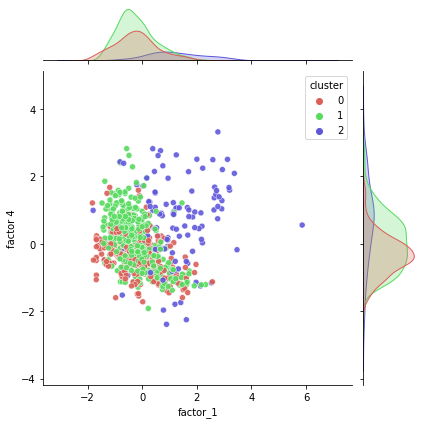

In [19]:
# more plots to show the clusters
sns.jointplot(data=df,x ='factor_1',y ='factor 4',hue='cluster',alpha=0.9,palette=sns.color_palette("hls", 3))

In [20]:
# more clustering from SpectralClustering algorithm
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)


In [21]:
# create a column to hod the labels
df['cluster_new']=labels

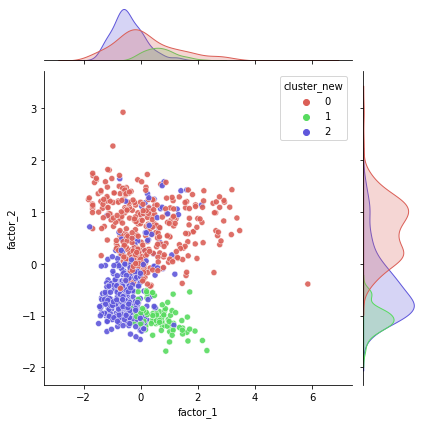

In [22]:
sns.jointplot(data=df,x ='factor_1',y ='factor_2',hue='cluster_new',alpha=0.9,palette=sns.color_palette("hls", 3))

In [151]:
# saving the clusters in a table
df.to_csv(r"C:\MyFiles\Dropbox\Teaching\Advanced_GIS_for_Environmental_Planning\Data\NYC\CensusTracts\Census_Tracts_with_Data_two_factor_brooklyn3_withClusters3.csv")